# Naive Bayes Classifier

## Example 01

In [1]:
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split

In [2]:
X, y = load_iris(return_X_y=True)

In [3]:
X_train, X_test, y_train, y_test = train_test_split(X,y,test_size=0.2, random_state=0)

In [4]:
# Seems like we have four features
print(X_train.shape, X_test.shape, y_train.shape, y_test.shape)

(120, 4) (30, 4) (120,) (30,)


In [5]:
# Seems like we have numerical (+ Continuous) data
print(X[1])

[4.9 3.  1.4 0.2]


In [6]:
from sklearn.naive_bayes import GaussianNB

GRB = GaussianNB()

In [7]:
m = GRB.fit(X_train, y_train)
y_pred = m.predict(X_test)

In [8]:
print("The number of mislabeled data out of %d data point is %d" % (X_test.shape[0], (y_pred != y_test).sum()))

The number of mislabeled data out of 30 data point is 1


In [9]:
from sklearn.metrics import confusion_matrix
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns; sns.set()

In [10]:
training = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_train.csv')
test = pd.read_csv('https://raw.githubusercontent.com/selva86/datasets/master/iris_test.csv')

In [11]:
# Create the X, Y, Training and Test
# The features are numerical values, the output is categorical.
xtrain = training.drop('Species', axis=1)
ytrain = training.loc[:, 'Species']
xtest = test.drop('Species', axis=1)
ytest = test.loc[:, 'Species']

In [12]:
# Init the Gaussian Classifier
model = GaussianNB()

# Train the model 
model.fit(xtrain, ytrain)

# Predict Output 
pred = model.predict(xtest)

Text(89.18, 0.5, 'Predicted')

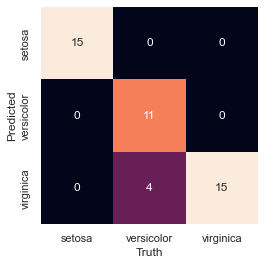

In [13]:
# Plot Confusion Matrix
mat = confusion_matrix(pred, ytest)
names = np.unique(pred)
sns.heatmap(mat, square=True, annot=True, fmt='d', cbar=False,
            xticklabels=names, yticklabels=names)
plt.xlabel('Truth')
plt.ylabel('Predicted')